# Preprocesamiento - Analisis Exploratorio de Datos con NLP - Análisis de Sentimientos con Machine Learning
------------------------------------------------------------------------------------------------------------------------

# Parte I - Preprocesamiento de datos

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Leemos el dataset limpio en un nuevo dataframe llamado pre_processed_reviews_df

In [2]:
pre_processed_reviews_df = pd.read_csv('../data/processed/pre_processed_reviews.csv', sep=',',decimal=',')
pre_processed_reviews_df.head(2)

,index,url,brand,name,prod_category,prod_subcategory,prod_type,sku,reviewer_name,review_title,...,helpful_count,not_helpful_count,reviewed_at,rating,average_rating,reviews_count,reviews_link,comment_id,uniq_id,review_status
0,0,https://www.gamestop.com/electronics/tvs-monit...,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,328244,Leeford,Untitled Review,...,0,0,10 months ago,5.0,4.2727,363,https://www.gamestop.com/on/demandware.store/S...,229196240,d749678d-aeba-5a6b-b8e2-8d2121463672,1
1,1,https://www.gamestop.com/electronics/tvs-monit...,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,328244,DJM7,Great looking screen!,...,0,0,10 months ago,4.0,4.2727,363,https://www.gamestop.com/on/demandware.store/S...,229179703,9f20312c-1047-5824-97d2-d5563b8fd046,1


### Renombrar la columna 'name' por 'product_name' (nombre del producto)

In [3]:
pre_processed_reviews_df.rename(columns={"name": "product_name"},inplace=True)

### ¿Qué tipo de dato son las variables y cuantos son en el dataset?

In [4]:
pre_processed_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4559 entries, 0 to 4558
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   index               4559 non-null   int64 
 1   url                 4559 non-null   object
 2   brand               4559 non-null   object
 3   product_name        4559 non-null   object
 4   prod_category       4559 non-null   object
 5   prod_subcategory    4559 non-null   object
 6   prod_type           4559 non-null   object
 7   sku                 4559 non-null   int64 
 8   reviewer_name       4559 non-null   object
 9   review_title        4559 non-null   object
 10  review_description  4559 non-null   object
 11  verifed_purchaser   4559 non-null   object
 12  helpful_count       4559 non-null   int64 
 13  not_helpful_count   4559 non-null   int64 
 14  reviewed_at         4559 non-null   object
 15  rating              4559 non-null   object
 16  average_rating      4559

In [5]:
# Aseguramos que las reseñas no estén duplicadas
pre_processed_reviews_df.drop_duplicates(subset= 'review_description', inplace=True)

### Cambiando el tipo de dato str de rating a int64

In [6]:
# Convert 'rating' and 'average_rating' to numeric, coercing errors to NaN
pre_processed_reviews_df['rating'] = pd.to_numeric(pre_processed_reviews_df['rating'], errors='coerce')
pre_processed_reviews_df['average_rating'] = pd.to_numeric(pre_processed_reviews_df['average_rating'], errors='coerce')

# Drop rows with NaN values in 'rating' or 'average_rating'
pre_processed_reviews_df.dropna(subset=['rating', 'average_rating'], inplace=True)

# Convert the 'rating' column to int64
pre_processed_reviews_df['rating'] = pre_processed_reviews_df['rating'].astype(float).astype('int64')


In [7]:
# ¿Cuantas variables de cada tipo tenemos en el DF?
pre_processed_reviews_df.dtypes.value_counts()

object     13
int64       8
float64     1
Name: count, dtype: int64

Tenemos **13** variables **categóricas** y **9 numéricas.**

### Visualización de categorias de productos

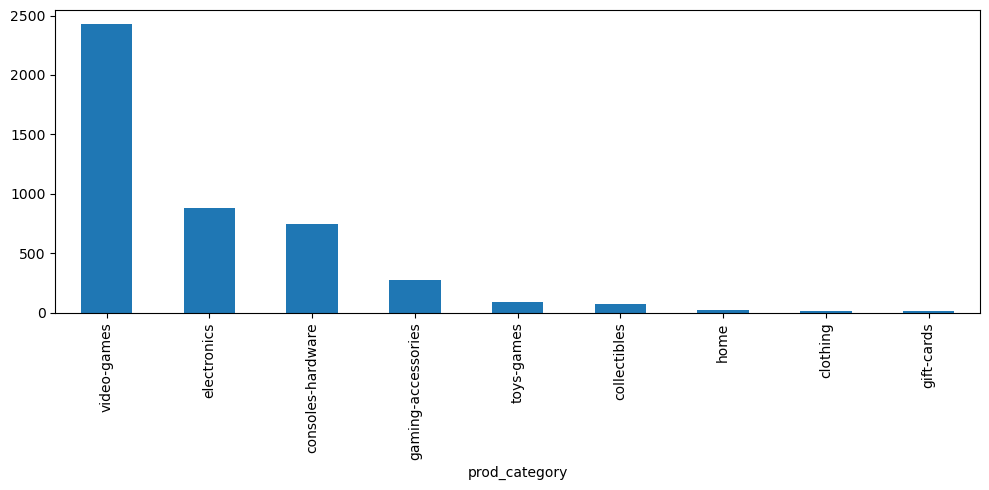

In [8]:
plt.figure(figsize=(10, 5))
pre_processed_reviews_df['prod_category'].value_counts().plot(kind='bar')
plt.tight_layout()
plt.show()

La categoría de productos comprados con más reseñas es la de **videojuegos.**

### Visualización de sub-categorias de productos

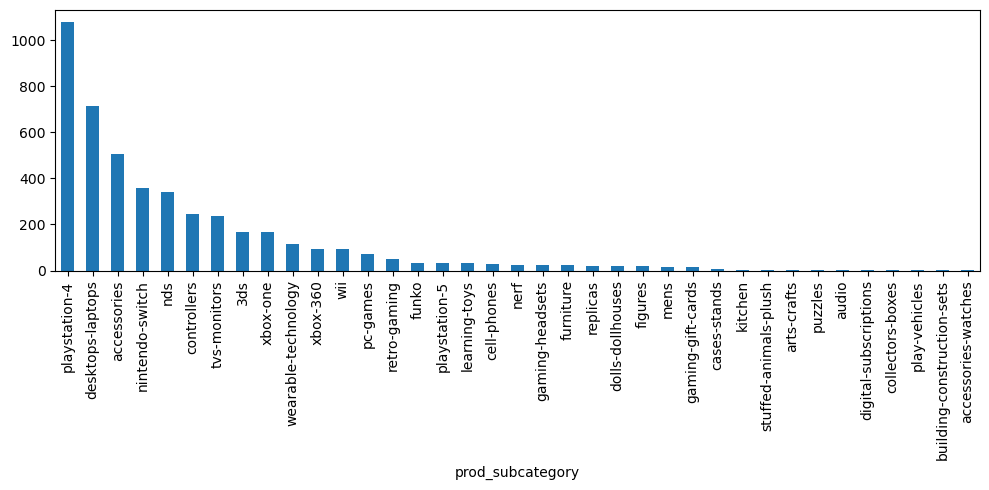

In [9]:
plt.figure(figsize=(10, 5))
pre_processed_reviews_df['prod_subcategory'].value_counts().plot(kind='bar')
plt.tight_layout()
plt.show()

### Visualización de las marcas (brands)

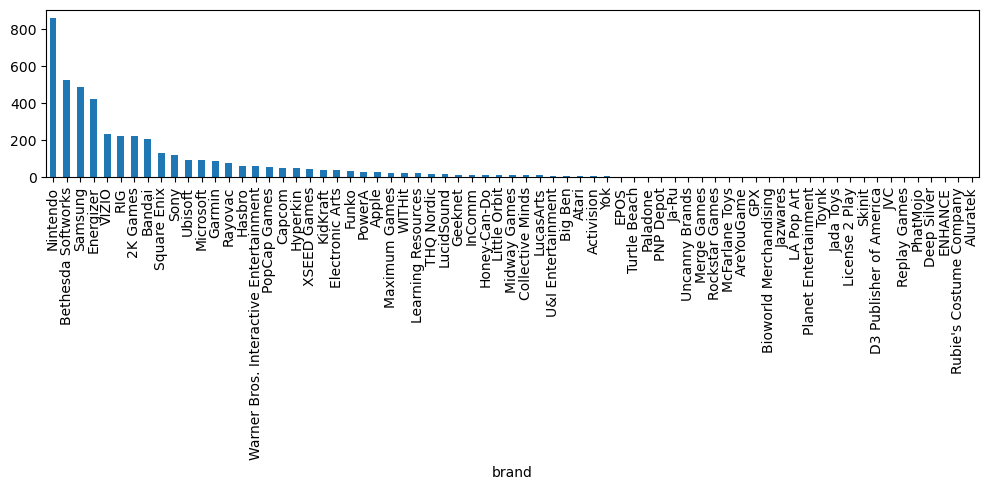

In [10]:
plt.figure(figsize=(10, 5))
pre_processed_reviews_df['brand'].value_counts().plot(kind='bar')
plt.tight_layout()
plt.show()

## Analizar Cantidad de values únicos por columna (no. de categorias)

In [11]:
columns_df  = pre_processed_reviews_df.columns
print(columns_df)

Index(['index', 'url', 'brand', 'product_name', 'prod_category',
       'prod_subcategory', 'prod_type', 'sku', 'reviewer_name', 'review_title',
       'review_description', 'verifed_purchaser', 'helpful_count',
       'not_helpful_count', 'reviewed_at', 'rating', 'average_rating',
       'reviews_count', 'reviews_link', 'comment_id', 'uniq_id',
       'review_status'],
      dtype='object')


In [12]:
for i in columns_df:
    print('\n',f'{i}: => ',pre_processed_reviews_df[i].nunique())


 index: =>  4557

 url: =>  120

 brand: =>  69

 product_name: =>  120

 prod_category: =>  9

 prod_subcategory: =>  37

 prod_type: =>  98

 sku: =>  120

 reviewer_name: =>  4341

 review_title: =>  3722

 review_description: =>  4557

 verifed_purchaser: =>  2

 helpful_count: =>  38

 not_helpful_count: =>  44

 reviewed_at: =>  55

 rating: =>  5

 average_rating: =>  89

 reviews_count: =>  70

 reviews_link: =>  528

 comment_id: =>  4557

 uniq_id: =>  4557

 review_status: =>  2


## Eliminar features irrelevantes para el modelado de ML
- Las features irrelevantes no tienen relación causal directa con el objetivo del modelo. **Ej: la url no influye en el rating.** 
- Las eliminamos para reducir el ruido en los datos y mejorar la precisión del modelo de Machine Learning.

In [13]:
# Eliminando features
pre_processed_reviews_df.drop(columns=['index','url','sku','reviewer_name','review_title',
                                      'verifed_purchaser','reviews_link','comment_id','uniq_id',
                                      'reviewed_at'], inplace=True)

In [14]:
pre_processed_reviews_df.dtypes.value_counts()

object     6
int64      5
float64    1
Name: count, dtype: int64

Ahora son **6** variables **categóricas** y **6 numéricas.**

In [15]:
pre_processed_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4557 entries, 0 to 4558
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   brand               4557 non-null   object 
 1   product_name        4557 non-null   object 
 2   prod_category       4557 non-null   object 
 3   prod_subcategory    4557 non-null   object 
 4   prod_type           4557 non-null   object 
 5   review_description  4557 non-null   object 
 6   helpful_count       4557 non-null   int64  
 7   not_helpful_count   4557 non-null   int64  
 8   rating              4557 non-null   int64  
 9   average_rating      4557 non-null   float64
 10  reviews_count       4557 non-null   int64  
 11  review_status       4557 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 462.8+ KB


In [16]:
pre_processed_reviews_df.head(2)

,brand,product_name,prod_category,prod_subcategory,prod_type,review_description,helpful_count,not_helpful_count,rating,average_rating,reviews_count,review_status
0,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,My new OLED is a upgrade and it's great! This...,0,0,5,4.2727,363,1
1,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,Rating is really a 4.5 but that's unavailable....,0,0,4,4.2727,363,1


In [17]:
from pathlib import Path
filepath = Path('../data/processed/processed_reviews.csv', index=False)  
filepath.parent.mkdir(parents=True, exist_ok=True) 
pre_processed_reviews_df.to_csv(filepath, index=False, encoding='utf-8')

# Parte II - Análisis exploratorio de los datos
1. **¿Cuáles son los términos relevantes más frecuentes en los comentarios?**  
   ¿Encuentras diferencias significativas entre la distribución de términos provenientes de comentarios positivos y negativos?  
   Para esta sección se entiende comentario positivo por aquel que termina recomendando el producto.

2. **Muestre una visualización básica de los datos**
-------------------------------------------------------------------------------------------------------

Para responder las 2 preguntas planteadas, haremos el **Análisis exploratorio de los datos con NLP**:

In [18]:
processed_reviews_df = pd.read_csv('../data/processed/processed_reviews.csv', sep=',',decimal=',')
processed_reviews_df.head(2)

,brand,product_name,prod_category,prod_subcategory,prod_type,review_description,helpful_count,not_helpful_count,rating,average_rating,reviews_count,review_status
0,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,My new OLED is a upgrade and it's great! This...,0,0,5,4.2727,363,1
1,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,Rating is really a 4.5 but that's unavailable....,0,0,4,4.2727,363,1


### Análisis exploratorio de los datos con NLP:

In [19]:
# Convert text to lowercase

import re
processed_reviews_df['review_description'] = processed_reviews_df['review_description'].str.lower()

Duplicamos la columna 'review_description' con el nombre de 'tags' (etiquetas) **para referirnos a los términos provenientes de comentarios negativos y positivos:**

In [20]:
processed_reviews_df['tags'] = processed_reviews_df['review_description']
processed_reviews_df.head(2)

,brand,product_name,prod_category,prod_subcategory,prod_type,review_description,helpful_count,not_helpful_count,rating,average_rating,reviews_count,review_status,tags
0,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,my new oled is a upgrade and it's great! this...,0,0,5,4.2727,363,1,my new oled is a upgrade and it's great! this...
1,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,rating is really a 4.5 but that's unavailable....,0,0,4,4.2727,363,1,rating is really a 4.5 but that's unavailable....


In [21]:
import nltk
from nltk.corpus import stopwords

# Descargar palabras vacías de NLTK
nltk.download('stopwords')

# Obtener las palabras vacías en inglés de NLTK
stop_words = set(stopwords.words('english'))

# Updating Stop Words

stop_words_upd = stop_words.copy()
stop_words_upd = ' '.join(stop_words)
stop_words_upd = re.sub(r'[^a-zA-Z0-9\s]', '', stop_words_upd)
stop_words_upd = set(stop_words_upd.split())

 # Struggling with these new other ones
stop_words_upd.update([
    '¿', '?', '~', '`', '!', '¡', '@', '#', '$', '%', '^',
    '*', '(', ')', '_', '-', '+', '=', '{', '}', '[',
    ']', '\\', ':', ';', '<', '>', '/', '.', ',', '&', '\n',
    '\r', '\t', '|', '“', '"', '–', '”', '©', '-', '—',
    '…', ';', '‘', '’','i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your',
    'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she','gamestop',
    'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their',
    'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that',
    'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being',
    'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an',
    'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of',
    'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through',
    'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
    'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once',
    'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each',
    'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only',
    'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just',
    'don', 'should', 'now','im', 'youre', 'hes', 'shes', 'its', 'were', 'theyre','ive','youve','weve', 'theyve',
    'will','ill','youll', 'hell','shell','itll','well','theyll','would','id','youd','hed','shed','itd','wed','theyd'])

                             
stop_words = stop_words_upd | stop_words
print(stop_words)

{'only', 'doing', 'more', 'wasnt', '\\', 'those', '\t', 'arent', "needn't", '©', 'wouldn', 'your', 'under', 'won', 'theyve', 'few', 'havent', 'his', "it's", 'doesnt', 'all', "doesn't", '/', ':', 'being', 'neednt', '¡', 'here', 'than', 're', 'too', 'ours', 'wasn', "mightn't", "wasn't", 'shant', 'of', '\n', "hasn't", '"', 'didn', 'out', "mustn't", 'wouldnt', 'some', 'should', 'can', '?', 'down', 'an', '’', 'so', 'd', 'he', 'as', 'wont', 'couldn', "that'll", '|', 'which', 'ma', 'no', 'gamestop', 'him', 've', 'hadnt', "wouldn't", 'does', 'hasnt', 'just', 'where', 'on', 'weve', 'our', '>', 'hed', 'mustnt', 'it', 'shell', "you've", 'has', 'what', "you'll", 'shouldnt', 'i', ')', '!', 'not', 'would', 'its', "shouldn't", 'through', 's', 'itd', 'and', 'in', 'or', 'when', 'mightn', 'herself', 'up', 'themselves', '@', "aren't", 'are', 'between', '$', 'having', 'ive', 'shes', 'above', 'am', "shan't", 'youll', 'aren', 'couldnt', '‘', 'mustn', 'yourselves', "hadn't", 'there', '{', 'with', 'very', '.'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
def stop_word(content):

    # Split the content into words
    words = content.split()

    # Remove stop words
    cleaned_words = [word for word in words if word.lower() not in stop_words]

    # Join the cleaned words back into a string
    cleaned_text = ' '.join(cleaned_words)
    
    return cleaned_text

In [23]:
processed_reviews_df['tags'] = processed_reviews_df['tags'].apply(stop_word)
processed_reviews_df.head()

,brand,product_name,prod_category,prod_subcategory,prod_type,review_description,helpful_count,not_helpful_count,rating,average_rating,reviews_count,review_status,tags
0,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,my new oled is a upgrade and it's great! this...,0,0,5,4.2727,363,1,new oled upgrade great! third vizio tv replace...
1,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,rating is really a 4.5 but that's unavailable....,0,0,4,4.2727,363,1,rating really 4.5 that's unavailable. unit loo...
2,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,i’m quite pleased with the entire product as a...,0,0,4,4.2727,363,1,i’m quite pleased entire product whole. qualit...
3,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,i’ve only had my new visio oled65 mounted and ...,0,0,2,4.2727,363,1,i’ve new visio oled65 mounted operating 3 days...
4,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,the picture is very crisp and the blacks very ...,0,0,5,4.2727,363,1,picture crisp blacks dark. beautiful color. vi...


In [24]:
# Removing Punctuation Marks

processed_reviews_df['tags'] = processed_reviews_df['tags'].apply(lambda review: stop_word(re.sub(r'[^a-zA-Z0-9\s]', '', review)))
processed_reviews_df.head()

,brand,product_name,prod_category,prod_subcategory,prod_type,review_description,helpful_count,not_helpful_count,rating,average_rating,reviews_count,review_status,tags
0,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,my new oled is a upgrade and it's great! this...,0,0,5,4.2727,363,1,new oled upgrade great third vizio tv replace ...
1,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,rating is really a 4.5 but that's unavailable....,0,0,4,4.2727,363,1,rating really 45 thats unavailable unit looks ...
2,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,i’m quite pleased with the entire product as a...,0,0,4,4.2727,363,1,quite pleased entire product whole quality pic...
3,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,i’ve only had my new visio oled65 mounted and ...,0,0,2,4.2727,363,1,new visio oled65 mounted operating 3 days like...
4,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,the picture is very crisp and the blacks very ...,0,0,5,4.2727,363,1,picture crisp blacks dark beautiful color vizi...


Ahora, vamos a reducir palabras a su forma base o raíz con **WordNetLemmatizer:**

In [25]:
from nltk.stem import WordNetLemmatizer

# Create a WordNet Lemmatizer
wn = WordNetLemmatizer()

# Function to lemmatize words
def lemmatize_text(text):
    # Tokenize the text into a list of words
    words = text.split()

    # Remove stopwords
#     stop_words = set(stopwords.words("english"))
    words = [word for word in words if word.lower() not in stop_words]

    # Lemmatize words
    lemmatized_words = [wn.lemmatize(word) for word in words]

    # Join the lemmatized words back into a string
    lemmatized_text = ' '.join(lemmatized_words)
    
    return lemmatized_text

In [26]:
# Apply lemmatization to the 'tags' column
processed_reviews_df['tags'] = processed_reviews_df['tags'].apply(stop_word)
processed_reviews_df['tags'] = processed_reviews_df['tags'].apply(lemmatize_text)
processed_reviews_df.head()

,brand,product_name,prod_category,prod_subcategory,prod_type,review_description,helpful_count,not_helpful_count,rating,average_rating,reviews_count,review_status,tags
0,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,my new oled is a upgrade and it's great! this...,0,0,5,4.2727,363,1,new oled upgrade great third vizio tv replace ...
1,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,rating is really a 4.5 but that's unavailable....,0,0,4,4.2727,363,1,rating really 45 thats unavailable unit look g...
2,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,i’m quite pleased with the entire product as a...,0,0,4,4.2727,363,1,quite pleased entire product whole quality pic...
3,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,i’ve only had my new visio oled65 mounted and ...,0,0,2,4.2727,363,1,new visio oled65 mounted operating 3 day like ...
4,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,the picture is very crisp and the blacks very ...,0,0,5,4.2727,363,1,picture crisp black dark beautiful color vizio...


In [27]:
# Function to remove numbers and numbers written as words

def remove_numbers(text):
    # Use re.sub() to remove numbers and numbers written as words
    no_numbers = re.sub(r'\b\d+\b|\b(one|two|three|four|five|six|seven|eight|nine|ten)\b', '', text)
    no_numbers = ' '.join(no_numbers.split())
    return no_numbers

In [28]:
processed_reviews_df['tags'] = processed_reviews_df['tags'].apply(stop_word)
processed_reviews_df['tags'] = processed_reviews_df['tags'].apply(remove_numbers)
processed_reviews_df.head()

,brand,product_name,prod_category,prod_subcategory,prod_type,review_description,helpful_count,not_helpful_count,rating,average_rating,reviews_count,review_status,tags
0,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,my new oled is a upgrade and it's great! this...,0,0,5,4.2727,363,1,new oled upgrade great third vizio tv replace ...
1,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,rating is really a 4.5 but that's unavailable....,0,0,4,4.2727,363,1,rating really thats unavailable unit look grea...
2,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,i’m quite pleased with the entire product as a...,0,0,4,4.2727,363,1,quite pleased entire product whole quality pic...
3,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,i’ve only had my new visio oled65 mounted and ...,0,0,2,4.2727,363,1,new visio oled65 mounted operating day like ki...
4,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,the picture is very crisp and the blacks very ...,0,0,5,4.2727,363,1,picture crisp black dark beautiful color vizio...


Con el método word_tokenize de nltk dividimos el texto de la columna 'tags' en **listas de palabras (tokens):**

In [29]:
# Tokenizing
processed_reviews_df['tags'] = processed_reviews_df['tags'].apply(stop_word)
processed_reviews_df['tags'] = processed_reviews_df['tags'].apply(lambda review: [word for word in nltk.tokenize.word_tokenize(review) if len(word) > 1 and word not in stop_words])
processed_reviews_df.head()

,brand,product_name,prod_category,prod_subcategory,prod_type,review_description,helpful_count,not_helpful_count,rating,average_rating,reviews_count,review_status,tags
0,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,my new oled is a upgrade and it's great! this...,0,0,5,4.2727,363,1,"[new, oled, upgrade, great, third, vizio, tv, ..."
1,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,rating is really a 4.5 but that's unavailable....,0,0,4,4.2727,363,1,"[rating, really, thats, unavailable, unit, loo..."
2,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,i’m quite pleased with the entire product as a...,0,0,4,4.2727,363,1,"[quite, pleased, entire, product, whole, quali..."
3,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,i’ve only had my new visio oled65 mounted and ...,0,0,2,4.2727,363,1,"[new, visio, oled65, mounted, operating, day, ..."
4,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,the picture is very crisp and the blacks very ...,0,0,5,4.2727,363,1,"[picture, crisp, black, dark, beautiful, color..."


### Análisis de Sentimientos con Afinn:

Antes de usar la libreria **Afinn,** divido el df en 2:

In [30]:
# 1. Comentarios positivos
pos_reviews = processed_reviews_df[processed_reviews_df['review_status']==1]

# 2. Comentarios negativos
neg_reviews = processed_reviews_df[processed_reviews_df['review_status']==0]

#### Terminos positivos

In [31]:
from afinn import Afinn

# Initialize the AFINN sentiment analyzer
afinn = Afinn()

# Concatenate the values of the 'tags' column into a single string
filtered_sentence = ' '.join(' '.join(tags) for tags in pos_reviews['tags'])

# Calculate the sentiment score for the entire text
overall_sentiment = afinn.score(filtered_sentence)

# Split the text into individual words
words = filtered_sentence.split()

# Create a dictionary to store sentiment scores for each word
word_sentiments = {word: afinn.score(word) for word in words}

# Now you can print the individual words based on their sentiment scores
terminos = [word for word, score in word_sentiments.items() if score >= 0]

In [32]:
terminos

['new',
 'oled',
 'upgrade',
 'great',
 'third',
 'vizio',
 'tv',
 'replace',
 'first',
 'went',
 'blank',
 'year',
 'stellar',
 'service',
 'even',
 'thinking',
 'getting',
 'repaired',
 'possible',
 'grand',
 'kid',
 'always',
 'liked',
 'picture',
 'quality',
 'price',
 'vizios',
 'cant',
 'go',
 'rating',
 'really',
 'thats',
 'unit',
 'look',
 'short',
 'physical',
 'feature',
 'bluetooth',
 'whatnot',
 'use',
 'external',
 'sound',
 'medium',
 'buy',
 'want',
 'reasonable',
 'quite',
 'pleased',
 'entire',
 'product',
 'whole',
 'speaks',
 'visio',
 'oled65',
 'mounted',
 'operating',
 'day',
 'like',
 'christmas',
 'get',
 'enough',
 'favorite',
 'gift',
 'brightness',
 'clarity',
 'another',
 'huge',
 'step',
 'forward',
 'evolution',
 'television',
 'find',
 'seeking',
 'programming',
 'showcase',
 'regardless',
 'genre',
 'intended',
 'audience',
 'newer',
 'computer',
 'generated',
 'cartoon',
 'redeemable',
 'imho',
 'save',
 'incredible',
 'graphic',
 'stunningly',
 'color

#### Wordcloud de Terminos positivos

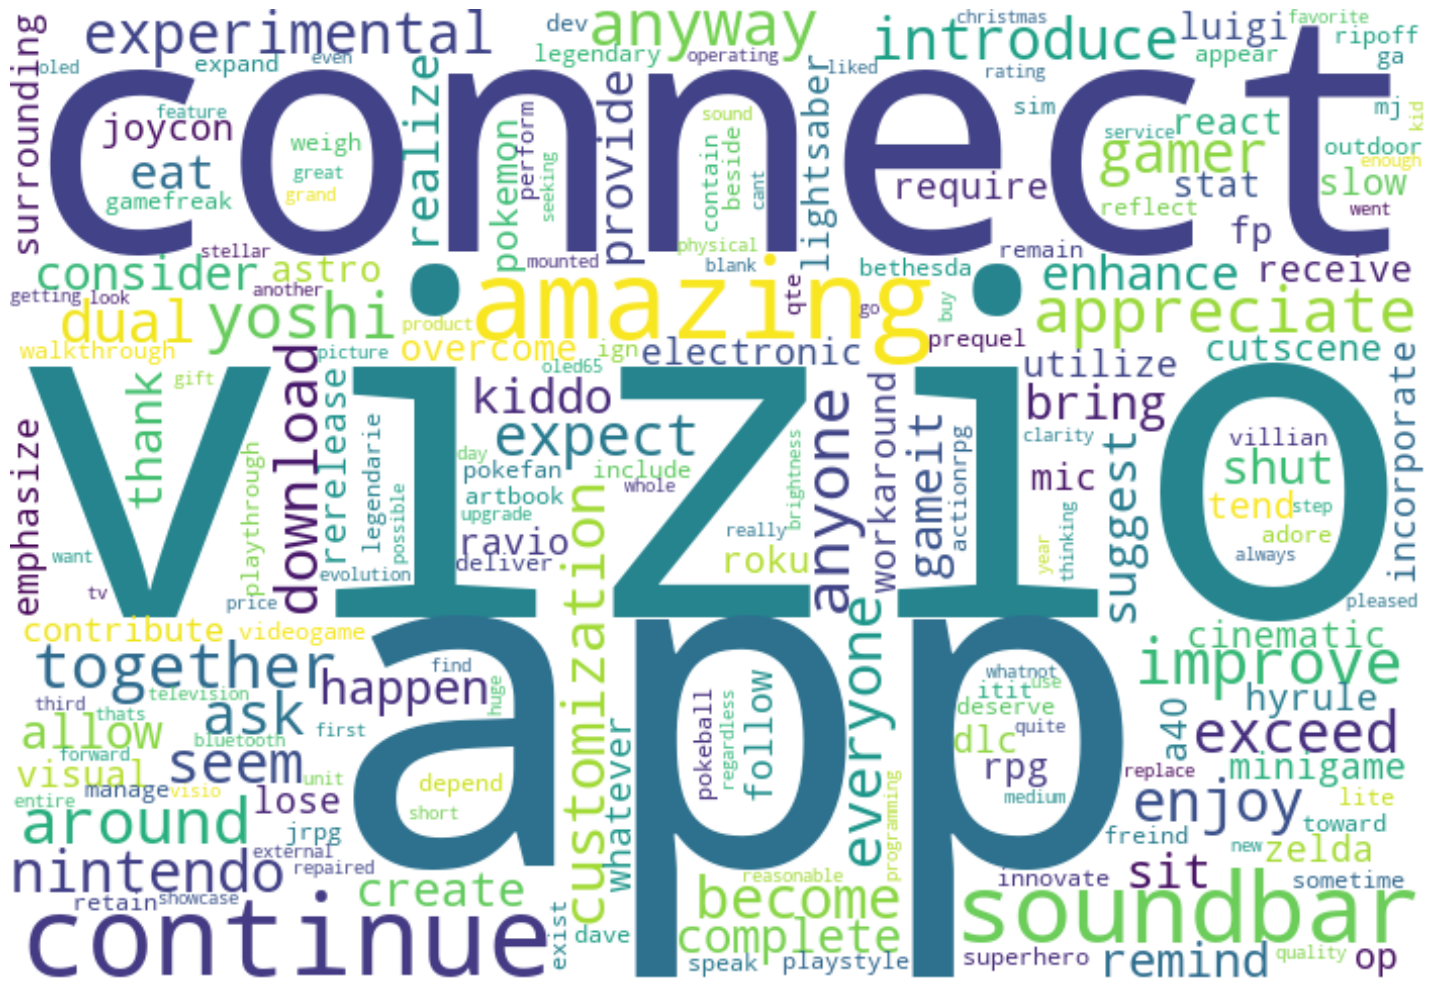

In [33]:
from wordcloud import WordCloud, STOPWORDS

# Assuming stop_words is defined somewhere earlier in your code

# Set up WordCloud parameters
stopwords = set(STOPWORDS)
stopwords.update(['words', 'to', 'exclude', 'from', 'the', 'wordcloud'])
wrd = WordCloud(
    background_color='white',
    width=700,
    height=480,
    margin=0,
    collocations=False,
    stopwords=stopwords
)

# Generate the word cloud for positive sentiment words
pos_wordcloud = wrd.generate(' '.join(terminos))

# Plot the word cloud for positive sentiment words
plt.figure(figsize=(15, 10))
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()  # Adjust layout to make it tighter
plt.show()

# Save the word cloud image
wrd.to_file('positivos_wordcloud.png')

#### Terminos negativos

In [34]:
# Initialize the AFINN sentiment analyzer
afinn = Afinn()

# Concatenate the values of the 'Tags' column into a single string
filtered_sentence = ' '.join(' '.join(tags) for tags in neg_reviews['tags'])

# Calculate the sentiment score for the entire text
overall_sentiment = afinn.score(filtered_sentence)

# Split the text into individual words
words = filtered_sentence.split()

# Create a dictionary to store sentiment scores for each word
word_sentiments = {word: afinn.score(word) for word in words}

# Now you can print the individual words based on their sentiment scores
terminos = [word for word, score in word_sentiments.items() if score < 0]

In [35]:
terminos

['mistake',
 'hard',
 'challenge',
 'silly',
 'hate',
 'annoyance',
 'alone',
 'annoys',
 'annoying',
 'kill',
 'confusing',
 'war',
 'bad',
 'wrong',
 'suck',
 'disappointed',
 'severe',
 'pain',
 'missing',
 'broken',
 'childish',
 'mess',
 'accidentally',
 'stuck',
 'losing',
 'worst',
 'battle',
 'waste',
 'awful',
 'sad',
 'worse',
 'weak',
 'sorry',
 'limited',
 'stop',
 'doubt',
 'disappointment',
 'worrying',
 'firing',
 'enemy',
 'attack',
 'stopped',
 'trouble',
 'lag',
 'beaten',
 'drop',
 'dumb',
 'problem',
 'destroyed',
 'broke',
 'leave',
 'stupid',
 'insulting',
 'biased',
 'crush',
 'headache',
 'warning',
 'horrible',
 'dislike',
 'flop',
 'poor',
 'complaining',
 'useless',
 'frustrating',
 'dirt',
 'cut',
 'penalty',
 'garbage',
 'boring',
 'unacceptable',
 'wasted',
 'error',
 'weird',
 'leaked',
 'lack',
 'inhibit',
 'missed',
 'prevent',
 'shame',
 'fail',
 'hurt',
 'lost',
 'crap',
 'blocking',
 'worn',
 'badly',
 'frustration',
 'upset',
 'defect',
 'sluggish',

#### Wordcloud de Terminos negativos

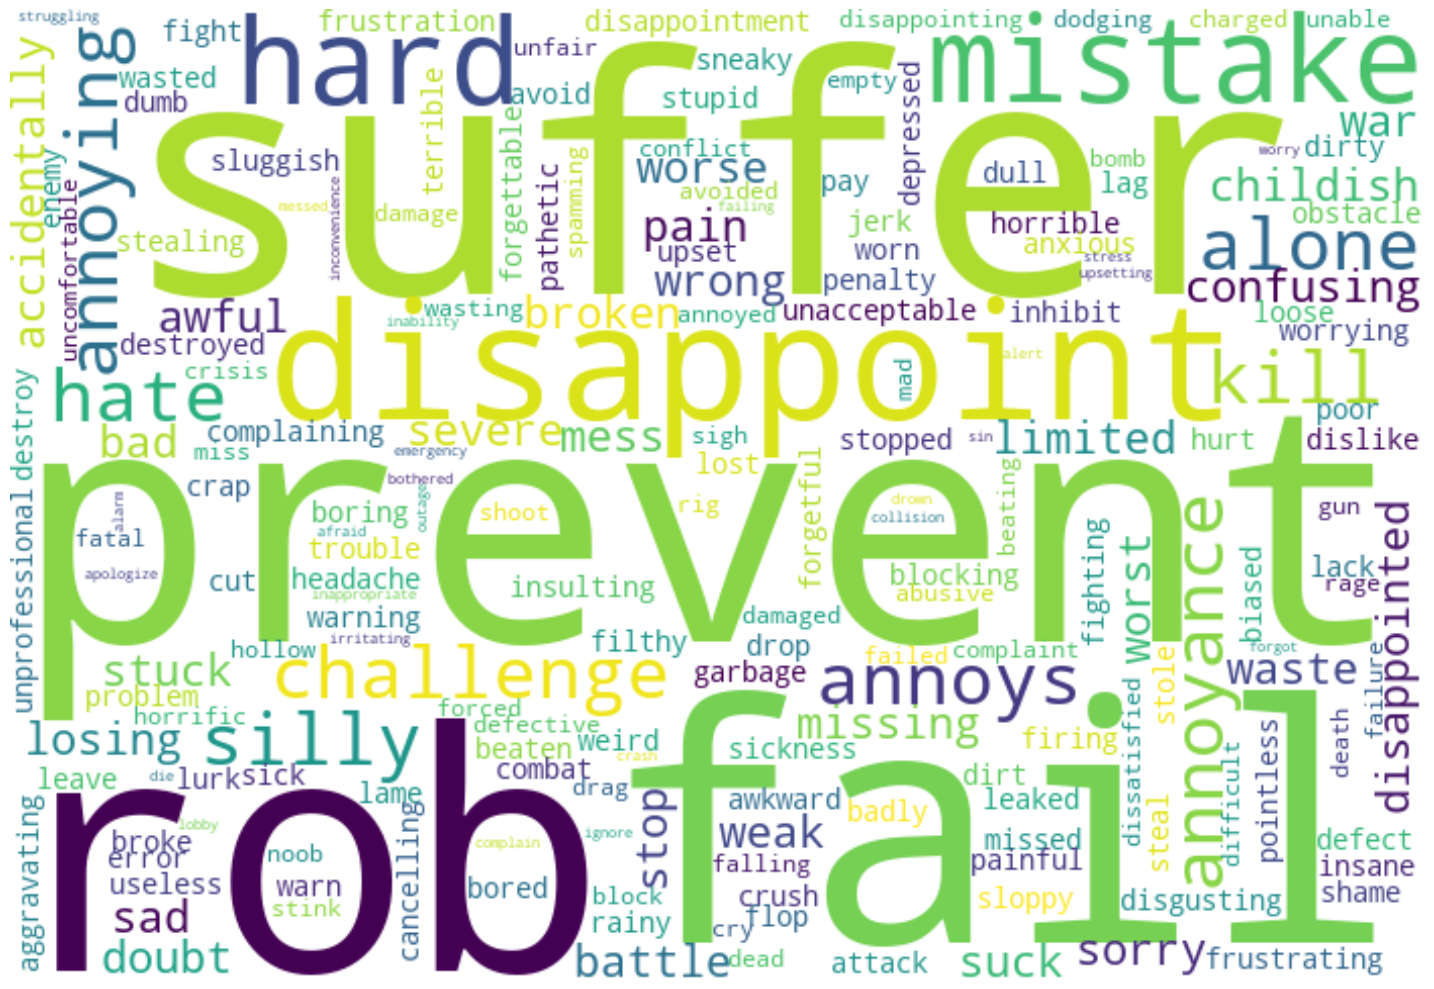

In [36]:
# Assuming stop_words is defined somewhere earlier in your code

# Set up WordCloud parameters
stopwords = set(STOPWORDS)
stopwords.update(['words', 'to', 'exclude', 'from', 'the', 'wordcloud'])
wrd = WordCloud(
    background_color='white',
    width=700,
    height=480,
    margin=0,
    collocations=False,
    stopwords=stopwords
)

# Generate the word cloud for negative sentiment words
neg_wordcloud = wrd.generate(' '.join(terminos))

# Plot the word cloud for positive sentiment words
plt.figure(figsize=(15, 10))
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()  # Adjust layout to make it tighter
plt.show()

# Save the word cloud image
wrd.to_file('negativos_wordcloud.png')

In [37]:
# Haciendo una prueba con el tag o término 'fail'
neg_reviews[neg_reviews['review_description'].str.contains('fail')]

,brand,product_name,prod_category,prod_subcategory,prod_type,review_description,helpful_count,not_helpful_count,rating,average_rating,reviews_count,review_status,tags
444,VIZIO,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,electronics,tvs-monitors,televisions,pros: price was awesome for an oled. picture ...,0,0,3,4.2727,363,0,"[pro, price, awesome, oled, picture, pristine,..."
700,Square Enix,Thief - Xbox One,video-games,xbox-one,thief---xbox-one,the controls are glitchy at best. try sneaking...,0,0,2,3.52,125,0,"[control, glitchy, best, try, sneaking, someon..."
780,Square Enix,Thief - Xbox One,video-games,xbox-one,thief---xbox-one,okay! i had to write a review. i do not do thi...,26,25,2,3.52,125,0,"[okay, write, review, often, first, time, watc..."
931,RIG,RIG 800HS Wireless Gaming Headset for PlayStat...,consoles-hardware,desktops-laptops,pc-headsets,dead on arrival. tons of reviews about failed ...,4,3,1,4.4111,596,0,"[dead, arrival, ton, review, failed, battery, ..."
1417,THQ Nordic,Remnant: From the Ashes - PlayStation 4,video-games,playstation-4,remnant-from-the-ashes---playstation-4,"the graphics, game play, and level design for ...",6,16,2,3.8,35,0,"[graphic, game, play, level, design, remnant, ..."
2173,Nintendo,Pokemon Black - Nintendo DS,video-games,nds,pokemon-black---nintendo-ds,well the game is good. the new pokemon are jus...,4,1,4,4.4195,553,0,"[game, good, new, pokemon, big, happened, poke..."
2187,2K Games,WWE 2K19 - PlayStation 4,video-games,playstation-4,wwe-2k19---playstation-4,a very ambitious game. i can see what the the ...,0,0,3,4.2351,1195,0,"[ambitious, game, see, developer, mind, game, ..."
2863,Samsung,Samsung 49-in Super Ultra-Wide Dual QHD (5120x...,consoles-hardware,desktops-laptops,monitors,demonstrated crippling issues out of the box.\...,0,0,1,4.5319,643,0,"[demonstrated, crippling, issue, box, tested, ..."
3917,Activision,Angry Birds: Star Wars - Xbox One,video-games,xbox-one,angry-birds-star-wars---xbox-one,this game should have been ended a long time a...,3,6,2,4.2941,17,0,"[game, ended, long, time, ago, mobile, device,..."
4221,Bethesda Softworks,Fallout 4 - PlayStation 4,video-games,playstation-4,fallout-4---playstation-4,i had really high hopes for this game when i h...,1,3,3,4.4535,1182,0,"[really, high, hope, game, heard, released, fi..."


#### Gráfico de barras que representa la cantidad de reseñas negativas por categoría de producto

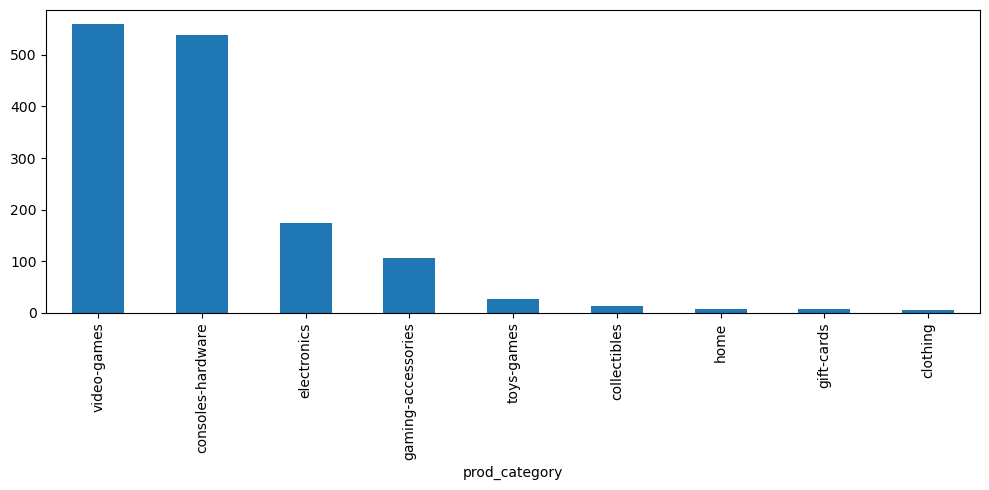

In [38]:
plt.figure(figsize=(10, 5))
neg_reviews['prod_category'].value_counts().plot(kind='bar')
plt.tight_layout()
plt.show()

#### Diagrama de Pareto para identificar las categorías más prioritarias de atender en cuanto reseñas negativas

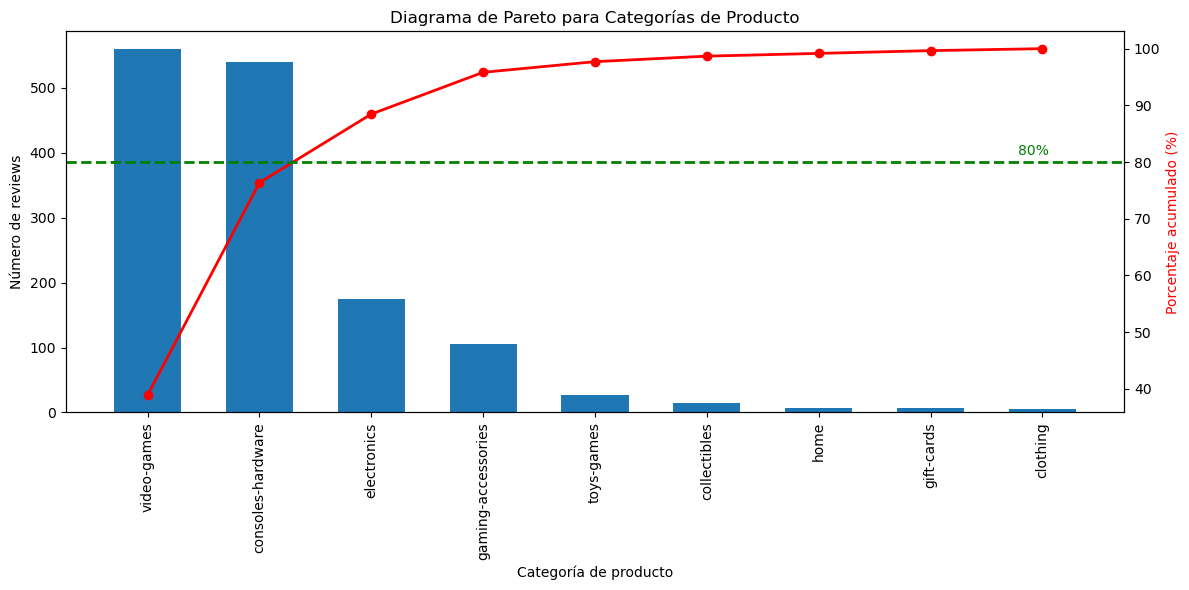

In [39]:
# Calcular los recuentos de cada categoría
category_counts = neg_reviews['prod_category'].value_counts()

# Ordenar las categorías por frecuencia descendente
sorted_categories = category_counts.sort_values(ascending=False)

# Calcular la suma acumulada y el porcentaje acumulado
cumulative_counts = sorted_categories.cumsum()
cumulative_percentage = cumulative_counts / cumulative_counts.max() * 100

# Crear el gráfico de Pareto
fig, ax1 = plt.subplots(figsize=(12, 6))

# Ancho de las barras
bar_width = 0.6

# Rotar etiquetas del eje x y ajustar espaciado
plt.xticks(rotation=90, ha='center')
plt.subplots_adjust(bottom=0.3)  # Ajustar margen inferior para evitar superposiciones

# Gráfico de barras con color predeterminado
bars = ax1.bar(sorted_categories.index, sorted_categories, width=bar_width)
ax1.set_xlabel('Categoría de producto')
ax1.set_ylabel('Número de reviews')

# Segundo eje y para el porcentaje acumulado
ax2 = ax1.twinx()
line = ax2.plot(sorted_categories.index, cumulative_percentage, color='r', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('Porcentaje acumulado (%)', color='r')

# Añadir línea horizontal en 80%
ax2.axhline(y=80, color='g', linestyle='--', linewidth=2)
ax2.text(0.9, 82, '80%', color='g', va='center', ha='left', transform=ax2.get_yaxis_transform())  # Ajustar posición del texto

# Título y mostrar el gráfico
plt.title('Diagrama de Pareto para Categorías de Producto')
plt.tight_layout()
plt.show()

#### Observaciones:

1. el 80% de los comentarios negativos provienen del 20% de las categorias de productos (video games y consoles-hardware). Evidentemente de los productos que las personas mas compran y hacen comentarios
2. Para poner un modelo experimental de producción y sea lo mas preciso, utilizaremos la información de solo esas 2 categorias, con comentarios positivos y negativos

# Parte III. Análisis de sentimientos con ML

1. **Entrene uno o varios modelos para clasificar los comentarios en las siguientes categorías: positivos (rating 4 - 5), neutrales (rating 3) y negativos.**  
   Justifica qué métrica de evaluación has elegido para determinar el modelo que pondrías en producción.
-------------------------------------------------------------------------------------------------------

In [40]:
processed_reviews_df.drop(columns=['prod_type','tags'], inplace=True)

column_order = ['brand', 'prod_category', 'prod_subcategory','product_name',
       'review_description', 'helpful_count', 'not_helpful_count',
       'average_rating', 'reviews_count','rating','review_status']

processed_reviews_df = processed_reviews_df[column_order]
processed_reviews_df.head()

,brand,prod_category,prod_subcategory,product_name,review_description,helpful_count,not_helpful_count,average_rating,reviews_count,rating,review_status
0,VIZIO,electronics,tvs-monitors,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,my new oled is a upgrade and it's great! this...,0,0,4.2727,363,5,1
1,VIZIO,electronics,tvs-monitors,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,rating is really a 4.5 but that's unavailable....,0,0,4.2727,363,4,1
2,VIZIO,electronics,tvs-monitors,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,i’m quite pleased with the entire product as a...,0,0,4.2727,363,4,1
3,VIZIO,electronics,tvs-monitors,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,i’ve only had my new visio oled65 mounted and ...,0,0,4.2727,363,2,1
4,VIZIO,electronics,tvs-monitors,VIZIO 55-in Class OLED 4K HDR Smart TV OLED55-H1,the picture is very crisp and the blacks very ...,0,0,4.2727,363,5,1


In [41]:
pre_model_reviews_df = processed_reviews_df[(processed_reviews_df['prod_category'] == 'video-games')
                                         | (processed_reviews_df['prod_category'] == 'console-hardware')].reset_index(drop=True)

pre_model_reviews_df.head()

,brand,prod_category,prod_subcategory,product_name,review_description,helpful_count,not_helpful_count,average_rating,reviews_count,rating,review_status
0,Nintendo,video-games,nintendo-switch,Yoshi's Crafted World - Nintendo Switch,yoshi game was awesome and still playing it th...,0,0,4.6556,2390,5,0
1,Nintendo,video-games,nintendo-switch,Yoshi's Crafted World - Nintendo Switch,great game. you will enjoy it. good price wort...,0,0,4.6556,2390,5,0
2,Nintendo,video-games,nintendo-switch,Yoshi's Crafted World - Nintendo Switch,"my son loves to play this game, he's been play...",0,0,4.6556,2390,5,0
3,Nintendo,video-games,nintendo-switch,Yoshi's Crafted World - Nintendo Switch,the game is great for a family and younger chi...,0,0,4.6556,2390,5,0
4,Nintendo,video-games,nintendo-switch,Yoshi's Crafted World - Nintendo Switch,it would be better if poochy was in all of the...,1,0,4.6556,2390,4,0


In [42]:
# Rating
pre_model_reviews_df['rating'].value_counts()

rating
5    1439
4     572
3     162
1     153
2      99
Name: count, dtype: int64

In [43]:
# ¿Cuantas reseñas negativas y positivas hay en total?
pre_model_reviews_df['review_status'].value_counts()

review_status
1    1866
0     559
Name: count, dtype: int64

In [44]:
# What are the data types?
pre_model_reviews_df.dtypes.value_counts()

object    6
int64     5
Name: count, dtype: int64

Voy a revisar si las columnas o features tienen correlaciones fuertes

In [45]:
pre_model_reviews_df_corr = round(pre_model_reviews_df.corr(numeric_only=True), 2)
pre_model_reviews_df_corr.style.background_gradient(cmap='coolwarm')

,helpful_count,not_helpful_count,reviews_count,rating,review_status
helpful_count,1.000000,0.270000,-0.140000,-0.020000,-0.000000
not_helpful_count,0.270000,1.000000,-0.080000,-0.340000,-0.250000
reviews_count,-0.140000,-0.080000,1.000000,0.100000,-0.020000
rating,-0.020000,-0.340000,0.100000,1.000000,0.600000
review_status,-0.000000,-0.250000,-0.020000,0.600000,1.000000


La columna 'review_status' (recomienda un producto o no) tiene una correlación moderada con el rating.

In [46]:
pre_model_reviews_df.head()

,brand,prod_category,prod_subcategory,product_name,review_description,helpful_count,not_helpful_count,average_rating,reviews_count,rating,review_status
0,Nintendo,video-games,nintendo-switch,Yoshi's Crafted World - Nintendo Switch,yoshi game was awesome and still playing it th...,0,0,4.6556,2390,5,0
1,Nintendo,video-games,nintendo-switch,Yoshi's Crafted World - Nintendo Switch,great game. you will enjoy it. good price wort...,0,0,4.6556,2390,5,0
2,Nintendo,video-games,nintendo-switch,Yoshi's Crafted World - Nintendo Switch,"my son loves to play this game, he's been play...",0,0,4.6556,2390,5,0
3,Nintendo,video-games,nintendo-switch,Yoshi's Crafted World - Nintendo Switch,the game is great for a family and younger chi...,0,0,4.6556,2390,5,0
4,Nintendo,video-games,nintendo-switch,Yoshi's Crafted World - Nintendo Switch,it would be better if poochy was in all of the...,1,0,4.6556,2390,4,0


In [47]:
cat_feat_df = pre_model_reviews_df[['brand', 'prod_category', 'prod_subcategory', 'product_name', 'review_description']]
cat_feat_df.head()

,brand,prod_category,prod_subcategory,product_name,review_description
0,Nintendo,video-games,nintendo-switch,Yoshi's Crafted World - Nintendo Switch,yoshi game was awesome and still playing it th...
1,Nintendo,video-games,nintendo-switch,Yoshi's Crafted World - Nintendo Switch,great game. you will enjoy it. good price wort...
2,Nintendo,video-games,nintendo-switch,Yoshi's Crafted World - Nintendo Switch,"my son loves to play this game, he's been play..."
3,Nintendo,video-games,nintendo-switch,Yoshi's Crafted World - Nintendo Switch,the game is great for a family and younger chi...
4,Nintendo,video-games,nintendo-switch,Yoshi's Crafted World - Nintendo Switch,it would be better if poochy was in all of the...


In [48]:
pre_model_reviews_df = pre_model_reviews_df[['product_name','helpful_count','not_helpful_count','average_rating','reviews_count','review_status','rating']]
pre_model_reviews_df.head()

,product_name,helpful_count,not_helpful_count,average_rating,reviews_count,review_status,rating
0,Yoshi's Crafted World - Nintendo Switch,0,0,4.6556,2390,0,5
1,Yoshi's Crafted World - Nintendo Switch,0,0,4.6556,2390,0,5
2,Yoshi's Crafted World - Nintendo Switch,0,0,4.6556,2390,0,5
3,Yoshi's Crafted World - Nintendo Switch,0,0,4.6556,2390,0,5
4,Yoshi's Crafted World - Nintendo Switch,1,0,4.6556,2390,0,4


In [49]:
from sklearn.preprocessing import LabelEncoder

# Crear una copia del DataFrame para no modificar el original
df_encoded = pre_model_reviews_df.copy()

# Inicializar el LabelEncoder
le = LabelEncoder()

# Identificar las columnas categóricas (todas excepto 'rating')
categorical_columns = df_encoded.select_dtypes(include=['object']).columns

# Aplicar LabelEncoder a cada columna categórica
for column in categorical_columns:
    df_encoded[column] = le.fit_transform(df_encoded[column])

# Mostrar el DataFrame resultante
df_encoded.head()


,product_name,helpful_count,not_helpful_count,average_rating,reviews_count,review_status,rating
0,53,0,0,43,2390,0,5
1,53,0,0,43,2390,0,5
2,53,0,0,43,2390,0,5
3,53,0,0,43,2390,0,5
4,53,1,0,43,2390,0,4


In [50]:
from sklearn.preprocessing import RobustScaler

# Crear una copia del DataFrame para no modificar el original
df_normalized = df_encoded.copy()

# Inicializar el RobustScaler
scaler = RobustScaler()

# Identificar las columnas que queremos normalizar
columns_to_normalize = df_normalized.columns.difference(['rating'])

# Aplicar el RobustScaler a las columnas seleccionadas
df_normalized[columns_to_normalize] = scaler.fit_transform(df_normalized[columns_to_normalize])

# Mostrar el DataFrame resultante
df_normalized.head()


,product_name,helpful_count,not_helpful_count,average_rating,reviews_count,review_status,rating
0,0.636364,0.0,0.0,0.714286,2.018028,-1.0,5
1,0.636364,0.0,0.0,0.714286,2.018028,-1.0,5
2,0.636364,0.0,0.0,0.714286,2.018028,-1.0,5
3,0.636364,0.0,0.0,0.714286,2.018028,-1.0,5
4,0.636364,0.5,0.0,0.714286,2.018028,-1.0,4


In [51]:
from sklearn.model_selection import train_test_split

# Columnas que contienen las features de las reseñas o reviews en X
X = df_normalized.drop('rating', axis=1)

# Columnas que contiene el target en y
y = df_normalized['rating']

# Dividir los datos en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


X_train shape: (1940, 6), X_test shape: (485, 6)
y_train shape: (1940,), y_test shape: (485,)


In [52]:
X_train

,product_name,helpful_count,not_helpful_count,average_rating,reviews_count,review_status
2200,-0.545455,2.5,0.0,0.500000,0.810180,-1.0
1844,0.000000,2.5,4.0,0.000000,0.069989,0.0
1852,-0.575758,0.0,1.0,0.142857,0.737010,0.0
2345,-0.606061,0.0,0.0,-0.785714,-0.392365,0.0
2004,-0.575758,0.5,0.0,0.142857,0.737010,0.0
...,...,...,...,...,...,...
1638,-0.575758,0.5,0.0,0.142857,0.737010,0.0
1095,-0.030303,0.0,0.0,-0.357143,-0.399788,0.0
1130,-0.030303,0.0,0.0,-0.357143,-0.399788,0.0
1294,0.000000,1.0,2.0,0.000000,0.069989,0.0


In [53]:
X_test

,product_name,helpful_count,not_helpful_count,average_rating,reviews_count,review_status
1490,0.606061,0.5,0.0,-0.500000,0.750795,0.0
387,0.363636,0.5,0.0,0.071429,-0.257688,-1.0
1419,-0.696970,0.0,0.0,-0.071429,0.000000,-1.0
410,0.363636,0.0,0.0,0.071429,-0.257688,-1.0
482,0.424242,1.0,0.0,0.857143,-0.096501,-1.0
...,...,...,...,...,...,...
602,0.424242,0.0,0.0,0.857143,-0.096501,0.0
679,0.030303,0.0,0.0,0.571429,-0.135737,0.0
178,0.636364,0.5,0.0,0.714286,2.018028,0.0
1011,0.606061,0.0,0.0,-0.500000,0.750795,0.0


In [54]:
y_train

2200    5
1844    5
1852    5
2345    4
2004    5
       ..
1638    4
1095    4
1130    5
1294    5
860     5
Name: rating, Length: 1940, dtype: int64

In [55]:
y_test

1490    5
387     1
1419    5
410     5
482     5
       ..
602     5
679     5
178     5
1011    4
324     2
Name: rating, Length: 485, dtype: int64

In [56]:
type(y_test)

pandas.core.series.Series

In [57]:
y_test_df = []
for i, value in enumerate(y_test):
    y_test_df.append((i,value))

In [58]:
y_test_df = pd.DataFrame(y_test_df, columns=["id", "rating_actual"])

In [59]:
y_test_df

,id,rating_actual
0,0,5
1,1,1
2,2,5
3,3,5
4,4,5
...,...,...
480,480,5
481,481,5
482,482,5
483,483,4


### Modelos

In [60]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state=42)

In [61]:
# Make a dict of hyperparameters values to search

search_space = {
    'n_estimators': [100,200,500],
    'max_depth': [3,6,9],
    'gamma': [0.01,0.1],
    'learning_rate': [0.001,0.01,0.1,1]
}

In [62]:
from sklearn.model_selection import GridSearchCV

GS = GridSearchCV(estimator = xgb_model,
                 param_grid = search_space,
                 scoring = ['r2','neg_root_mean_squared_error'], # sklearn.metrics.SCORERS.keys()
                 refit = 'r2',
                 cv = 5,
                 verbose = 4)

In [63]:
GS.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-3.587) r2: (test=-9.840) total time=   0.0s
[CV 2/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-3.596) r2: (test=-9.148) total time=   0.0s
[CV 3/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-3.583) r2: (test=-8.143) total time=   0.0s
[CV 4/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-3.610) r2: (test=-9.219) total time=   0.0s
[CV 5/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-3.525) r2: (test=-8.386) total time=   0.0s
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-3.262) r2: (test=-7.968) total time=   0

[CV 5/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.921) r2: (test=0.360) total time=   0.0s
[CV 1/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=500; neg_root_mean_squared_error: (test=-0.756) r2: (test=0.518) total time=   0.0s
[CV 2/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=500; neg_root_mean_squared_error: (test=-0.695) r2: (test=0.621) total time=   0.0s
[CV 3/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=500; neg_root_mean_squared_error: (test=-0.721) r2: (test=0.630) total time=   0.0s
[CV 4/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=500; neg_root_mean_squared_error: (test=-0.770) r2: (test=0.536) total time=   0.0s
[CV 5/5] END gamma=0.01, learning_rate=0.01, max_depth=3, n_estimators=500; neg_root_mean_squared_error: (test=-0.760) r2: (test=0.563) total time=   0.0s
[CV 1/5] END gamma=0.01, learning_rate=0.01, max_depth=6, n_estimators

[CV 1/5] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=200; neg_root_mean_squared_error: (test=-0.803) r2: (test=0.456) total time=   0.0s
[CV 2/5] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=200; neg_root_mean_squared_error: (test=-0.746) r2: (test=0.563) total time=   0.0s
[CV 3/5] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=200; neg_root_mean_squared_error: (test=-0.759) r2: (test=0.589) total time=   0.0s
[CV 4/5] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=200; neg_root_mean_squared_error: (test=-0.804) r2: (test=0.493) total time=   0.0s
[CV 5/5] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=200; neg_root_mean_squared_error: (test=-0.800) r2: (test=0.517) total time=   0.0s
[CV 1/5] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=500; neg_root_mean_squared_error: (test=-0.803) r2: (test=0.456) total time=   0.1s
[CV 2/5] END gamma=0.01, learning_rate=0.1, max_depth=6, n_estimators=500; n

[CV 5/5] END gamma=0.01, learning_rate=1, max_depth=6, n_estimators=500; neg_root_mean_squared_error: (test=-0.890) r2: (test=0.402) total time=   0.1s
[CV 1/5] END gamma=0.01, learning_rate=1, max_depth=9, n_estimators=100; neg_root_mean_squared_error: (test=-0.874) r2: (test=0.357) total time=   0.0s
[CV 2/5] END gamma=0.01, learning_rate=1, max_depth=9, n_estimators=100; neg_root_mean_squared_error: (test=-0.787) r2: (test=0.514) total time=   0.0s
[CV 3/5] END gamma=0.01, learning_rate=1, max_depth=9, n_estimators=100; neg_root_mean_squared_error: (test=-0.832) r2: (test=0.507) total time=   0.0s
[CV 4/5] END gamma=0.01, learning_rate=1, max_depth=9, n_estimators=100; neg_root_mean_squared_error: (test=-0.837) r2: (test=0.450) total time=   0.0s
[CV 5/5] END gamma=0.01, learning_rate=1, max_depth=9, n_estimators=100; neg_root_mean_squared_error: (test=-0.850) r2: (test=0.454) total time=   0.0s
[CV 1/5] END gamma=0.01, learning_rate=1, max_depth=9, n_estimators=200; neg_root_mean_s

[CV 3/5] END gamma=0.1, learning_rate=0.001, max_depth=9, n_estimators=200; neg_root_mean_squared_error: (test=-3.257) r2: (test=-6.557) total time=   0.0s
[CV 4/5] END gamma=0.1, learning_rate=0.001, max_depth=9, n_estimators=200; neg_root_mean_squared_error: (test=-3.282) r2: (test=-7.445) total time=   0.0s
[CV 5/5] END gamma=0.1, learning_rate=0.001, max_depth=9, n_estimators=200; neg_root_mean_squared_error: (test=-3.204) r2: (test=-6.755) total time=   0.1s
[CV 1/5] END gamma=0.1, learning_rate=0.001, max_depth=9, n_estimators=500; neg_root_mean_squared_error: (test=-2.489) r2: (test=-4.221) total time=   0.2s
[CV 2/5] END gamma=0.1, learning_rate=0.001, max_depth=9, n_estimators=500; neg_root_mean_squared_error: (test=-2.475) r2: (test=-3.807) total time=   0.2s
[CV 3/5] END gamma=0.1, learning_rate=0.001, max_depth=9, n_estimators=500; neg_root_mean_squared_error: (test=-2.465) r2: (test=-3.329) total time=   0.2s
[CV 4/5] END gamma=0.1, learning_rate=0.001, max_depth=9, n_esti

[CV 1/5] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.760) r2: (test=0.513) total time=   0.0s
[CV 2/5] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.699) r2: (test=0.617) total time=   0.0s
[CV 3/5] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.727) r2: (test=0.624) total time=   0.0s
[CV 4/5] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.769) r2: (test=0.536) total time=   0.0s
[CV 5/5] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-0.763) r2: (test=0.560) total time=   0.0s
[CV 1/5] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=500; neg_root_mean_squared_error: (test=-0.760) r2: (test=0.513) total time=   0.0s
[CV 2/5] END gamma=0.1, learning_rate=0.1, max_depth=3, n_estimators=500; neg_root

[CV 2/5] END gamma=0.1, learning_rate=1, max_depth=6, n_estimators=100; neg_root_mean_squared_error: (test=-0.730) r2: (test=0.582) total time=   0.0s
[CV 3/5] END gamma=0.1, learning_rate=1, max_depth=6, n_estimators=100; neg_root_mean_squared_error: (test=-0.824) r2: (test=0.517) total time=   0.0s
[CV 4/5] END gamma=0.1, learning_rate=1, max_depth=6, n_estimators=100; neg_root_mean_squared_error: (test=-0.848) r2: (test=0.437) total time=   0.0s
[CV 5/5] END gamma=0.1, learning_rate=1, max_depth=6, n_estimators=100; neg_root_mean_squared_error: (test=-0.863) r2: (test=0.437) total time=   0.0s
[CV 1/5] END gamma=0.1, learning_rate=1, max_depth=6, n_estimators=200; neg_root_mean_squared_error: (test=-0.855) r2: (test=0.384) total time=   0.0s
[CV 2/5] END gamma=0.1, learning_rate=1, max_depth=6, n_estimators=200; neg_root_mean_squared_error: (test=-0.730) r2: (test=0.582) total time=   0.0s
[CV 3/5] END gamma=0.1, learning_rate=1, max_depth=6, n_estimators=200; neg_root_mean_squared_

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=42, ...),
             param_grid={'gamma': [0.01, 0.1],
                         'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [100, 200, 500]},
             refit='r2', scoring=['r2', 'neg_root_mean_squared_error'],
             verbose=4)

In [64]:
print(GS.best_estimator_) # To get the complete details of the best model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.01, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)


In [65]:
print(GS.best_params_) # to get only the best hypterparameter values that we searched for

{'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [66]:
print(GS.best_score_) # score according to the metric we passed in refit

0.5749534265415843


In [67]:
# Obtener los mejores hiperparámetros
best_params = GS.best_params_
print("Mejores hiperparámetros:", best_params)

# Obtener los resultados
results = GS.cv_results_

Mejores hiperparámetros: {'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [68]:
from sklearn.metrics import mean_squared_error, f1_score, precision_score, recall_score, roc_auc_score
# Obtener el mejor modelo
best_model = GS.best_estimator_

# Predecir los valores en los datos de prueba
y_pred = best_model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE en datos de prueba:", rmse)

RMSE en datos de prueba: 0.8270584378595635


In [69]:
# Convertir las predicciones a clases discretas (si es necesario para la métrica específica)
y_pred_discrete = np.round(y_pred)

# Calcular el F1-score
f1 = f1_score(y_test, y_pred_discrete, average='weighted')
print("F1-Score en datos de prueba:", f1)

F1-Score en datos de prueba: 0.5594150486735371


In [70]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Definir el espacio de búsqueda para los hiperparámetros
param_dist = {
    'n_estimators': [100, 200, 500],
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.001, 1),
    'gamma': [0.01, 0.1]
}

# Inicializar RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', verbose=1, random_state=42)

# Ejecutar la búsqueda aleatoria en los datos de entrenamiento
random_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", best_params)

best_params = {'gamma': 0.1, 'learning_rate': 0.4504506741382034, 'max_depth': 3, 'n_estimators': 500}

from xgboost import XGBRegressor

# Crear el modelo XGBoost con los mejores hiperparámetros
best_model = XGBRegressor(
    gamma=best_params['gamma'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    n_estimators=best_params['n_estimators'],
    random_state=42  # Asegurando reproducibilidad
)

# Entrenar el modelo con los datos de entrenamiento
best_model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score

# Predecir en los datos de prueba
y_pred = best_model.predict(X_test)

# Calcular RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE en datos de prueba:", rmse)

# Calcular R^2
r2 = r2_score(y_test, y_pred)
print("R^2 en datos de prueba:", r2)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Mejores hiperparámetros: {'gamma': 0.1, 'learning_rate': 0.4504506741382034, 'max_depth': 3, 'n_estimators': 500}
RMSE en datos de prueba: 0.84216610155471
R^2 en datos de prueba: 0.509943603297751


#### Mejor modelo:

- Fitting 5 folds for each of 100 candidates, totalling 500 fits
- Mejores hiperparámetros: {'gamma': 0.1, 'learning_rate': 0.4504506741382034, 'max_depth': 3, 'n_estimators': 500}
- RMSE en datos de prueba: 0.84216610155471
- R^2 en datos de prueba: 0.509943603297751

In [71]:
solution = []
for i, value in enumerate(y_pred):
    rounded_value = round(value)
    # Asegurarse de que el valor redondeado no sea mayor que 5
    if rounded_value > 5:
        rounded_value = 5  # Establecer el máximo valor permitido
    
    # Clasificar el rating
    if rounded_value in [4, 5]:
        sentiment = 'positivo'
    elif rounded_value == 3:
        sentiment = 'neutral'
    else:
        sentiment = 'negativo'
    
    solution.append((i, rounded_value, sentiment))

In [72]:
# Convertir la lista a un DataFrame
train_model = pd.DataFrame(solution, columns=["id", "rating", "sentiment"])
train_model.head()

,id,rating,sentiment
0,0,4,positivo
1,1,4,positivo
2,2,4,positivo
3,3,4,positivo
4,4,5,positivo


In [73]:
train_model = pd.DataFrame(solution)
train_model

,0,1,2
0,0,4,positivo
1,1,4,positivo
2,2,4,positivo
3,3,4,positivo
4,4,5,positivo
...,...,...,...
480,480,5,positivo
481,481,5,positivo
482,482,4,positivo
483,483,4,positivo


In [74]:
train_model.columns=["id", "rating_pred","classification"]

In [75]:
train_model.reset_index(drop=True)

,id,rating_pred,classification
0,0,4,positivo
1,1,4,positivo
2,2,4,positivo
3,3,4,positivo
4,4,5,positivo
...,...,...,...
480,480,5,positivo
481,481,5,positivo
482,482,4,positivo
483,483,4,positivo


In [76]:
train_model = train_model.merge(y_test_df, on="id")

In [77]:
train_model

,id,rating_pred,classification,rating_actual
0,0,4,positivo,5
1,1,4,positivo,1
2,2,4,positivo,5
3,3,4,positivo,5
4,4,5,positivo,5
...,...,...,...,...
480,480,5,positivo,5
481,481,5,positivo,5
482,482,4,positivo,5
483,483,4,positivo,4


In [78]:
train_model['match'] = train_model['rating_pred'] == train_model['rating_actual']
train_model

,id,rating_pred,classification,rating_actual,match
0,0,4,positivo,5,False
1,1,4,positivo,1,False
2,2,4,positivo,5,False
3,3,4,positivo,5,False
4,4,5,positivo,5,True
...,...,...,...,...,...
480,480,5,positivo,5,True
481,481,5,positivo,5,True
482,482,4,positivo,5,False
483,483,4,positivo,4,True


In [79]:
train_model['match'].value_counts()

match
True     271
False    214
Name: count, dtype: int64

In [80]:
train_model['rating_pred'].value_counts()

rating_pred
5    277
4    124
3     43
2     36
1      5
Name: count, dtype: int64

In [81]:
train_model['rating_actual'].value_counts()

rating_actual
5    275
4    119
1     37
3     35
2     19
Name: count, dtype: int64

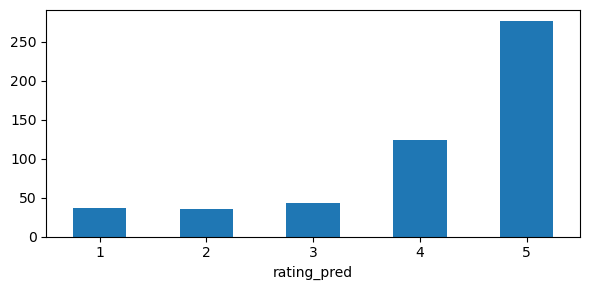

In [84]:
plt.figure(figsize=(6, 3))
train_model['rating_pred'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [83]:
from pathlib import Path
filepath = Path('../data/trained/train_model.csv', index=False)  
filepath.parent.mkdir(parents=True, exist_ok=True) 
train_model.to_csv(filepath, index=False, encoding='utf-8')